In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
# import zipfile
# with zipfile.ZipFile("data/statslib.zip","r") as zip_ref:
#     zip_ref.extractall(".")

In [58]:
df = pd.read_csv('data/housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Columns
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per USD 10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in USD 1000's

In [59]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [60]:
## check if there are any negative entry or nan entry
print('any negative values?', (df.values < 0).any())
print('any nan values?', (df.values == 'nan'))

any negative values? False
any nan values? False


/Users/manami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


## Feature Selection
### Target Value Selection (TAX vs MEDV)

Feature Selection is usually used for non-negative values. And as checked above, this dataset has no negative values. Feature selection can be divided into unsupervised and supervised method. Unsupervised method ignores target variable by removing the redundant values, whereas supervised method does consider the target variable and determine which features are related to the target variable.\
As our project primarily focuses on the price movement, we need a target value. One way to determine the price is the median price but another way could be tax. In this section, we determine the correlated features depending on each target value, whether tax or median price.\
\
Supervised method for feature selection can be divided into wrapper and filter methods. Wrapper method can be used for any type of entires and creates subsets of input features, whereas filter method uses statistical techniques to determine the relationships between a feature and a target variable.\
This dataset contains only numerical variables (CHAS is originally categorical variable, but it's now converted to 0/1) and price can be considered as a continuous variables in this context. Therefore, we will use filter method.

Peason's correlation is not suitable because we have non-metrix column (CHAS). 

1. TAX

In [61]:
x = df['TAX']
y = df.drop(labels='TAX', axis=1)
y.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [62]:
## First, determine the correlations among metric variables
metric_var = df.drop(labels='CHAS', axis=1)
metric_var.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [63]:
correlation = metric_var.corr(method='pearson')
correlation

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


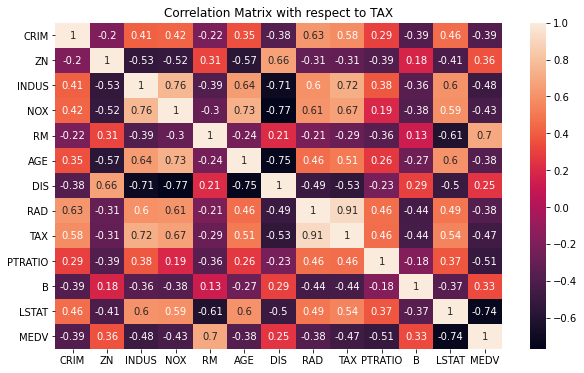

In [64]:
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix with respect to TAX')
sns.heatmap(correlation, annot=True)
plt.savefig('figure/data_exploration/kaggle_TAX_correlation_matrix.pdf', dpi=300)

As we want to knowthe features that are strongly correlated, we take the absolute values for all correlation coefficients and consider the values greater than 0.5 as "strong correlation" to the TAX value. 

<AxesSubplot:title={'center':'1990s Absolute Correlation Matrix with respect to TAX'}>

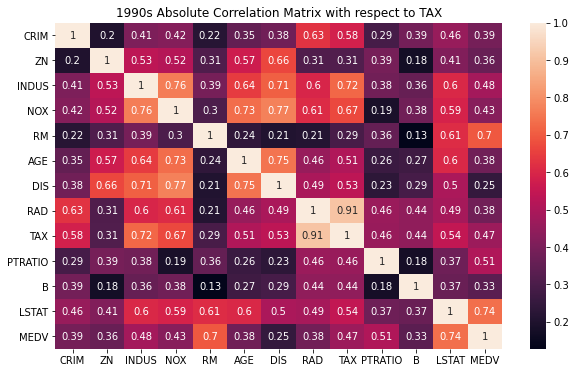

In [65]:
correlation = abs(metric_var.corr(method='pearson'))
plt.figure(figsize=(10, 6))
plt.title('1990s Absolute Correlation Matrix with respect to TAX')
sns.heatmap(correlation, annot=True)

In [66]:
selected_features = correlation['TAX']
selected_features = selected_features[selected_features > 0.5]
selected_features

CRIM     0.582764
INDUS    0.720760
NOX      0.668023
AGE      0.506456
DIS      0.534432
RAD      0.910228
TAX      1.000000
LSTAT    0.543993
Name: TAX, dtype: float64

In [67]:
## the target value = MEDV

x = df['MEDV']
y = df.drop(labels='MEDV', axis=1)
y.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [68]:
## First, determine the correlations among metric variables
metric_var = df.drop(labels='CHAS', axis=1)
metric_var.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [69]:
correlation = metric_var.corr(method='pearson')
correlation

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


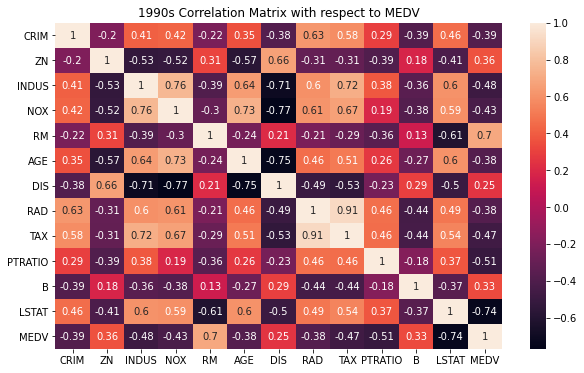

In [70]:
plt.figure(figsize=(10, 6))
plt.title('1990s Correlation Matrix with respect to MEDV')
sns.heatmap(correlation, annot=True)
plt.savefig('figure/data_exploration/kaggle_MEDV_correlation_matrix.pdf', dpi=300)

<AxesSubplot:title={'center':'1990s Absolute Correlation Matrix with respect to MEDV'}>

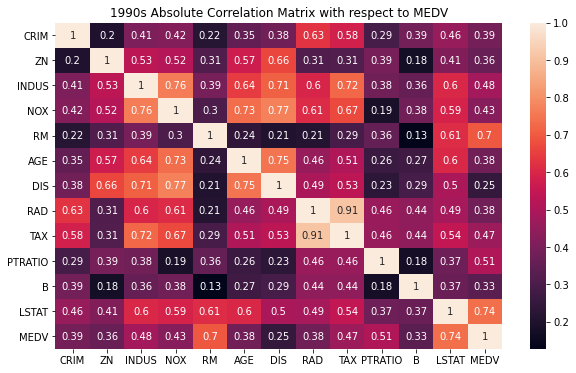

In [71]:
correlation = abs(metric_var.corr(method='pearson'))
plt.figure(figsize=(10, 6))
plt.title('1990s Absolute Correlation Matrix with respect to MEDV')
sns.heatmap(correlation, annot=True)

In [72]:
selected_features = correlation['MEDV']
selected_features = selected_features[selected_features > 0.5]
selected_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64